1 Edge Detection

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1.1 Canny

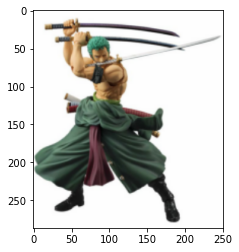

In [3]:
img = cv2.imread('data/zero.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

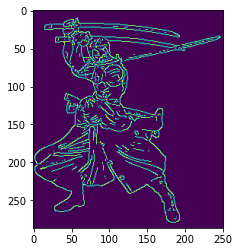

In [4]:
edgesCanny = cv2.Canny(image=img, threshold1=127, threshold2=127)
plt.imshow(edgesCanny)

1.2 Canny with Setting Thershold

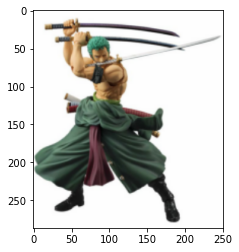

In [11]:
img = cv2.imread('data/zero.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

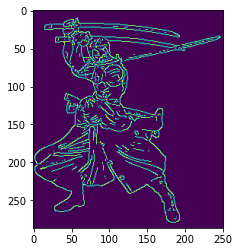

In [12]:
edgesCanny = cv2.Canny(image=img, threshold1=127, threshold2=127)
plt.imshow(edgesCanny)

1.2.1 Upper and Lower Median

In [13]:
med_val = np.median(img)
lower = int(max(0, 0.7 * med_val))
upper = int(min(255, 1.3 * med_val))

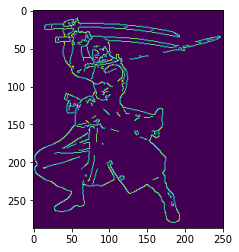

In [14]:
edgesCanny2 = cv2.Canny(image=img, threshold1=lower, threshold2=upper)
plt.imshow(edgesCanny2)

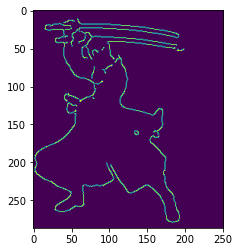

In [15]:
blurred_img = cv2.blur(img, ksize=(5,5))
edgesCanny3 = cv2.Canny(image=blurred_img, threshold1=lower, threshold2=upper)
plt.imshow(edgesCanny3)

1.3 Metode edge detection lainnya (Laplacian)

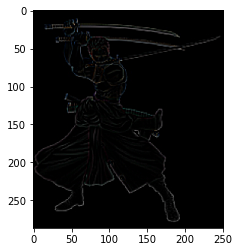

In [18]:
laplacian = cv2.Laplacian(img, cv2.CV_8U)
plt.imshow(laplacian)

1.4 Sobel

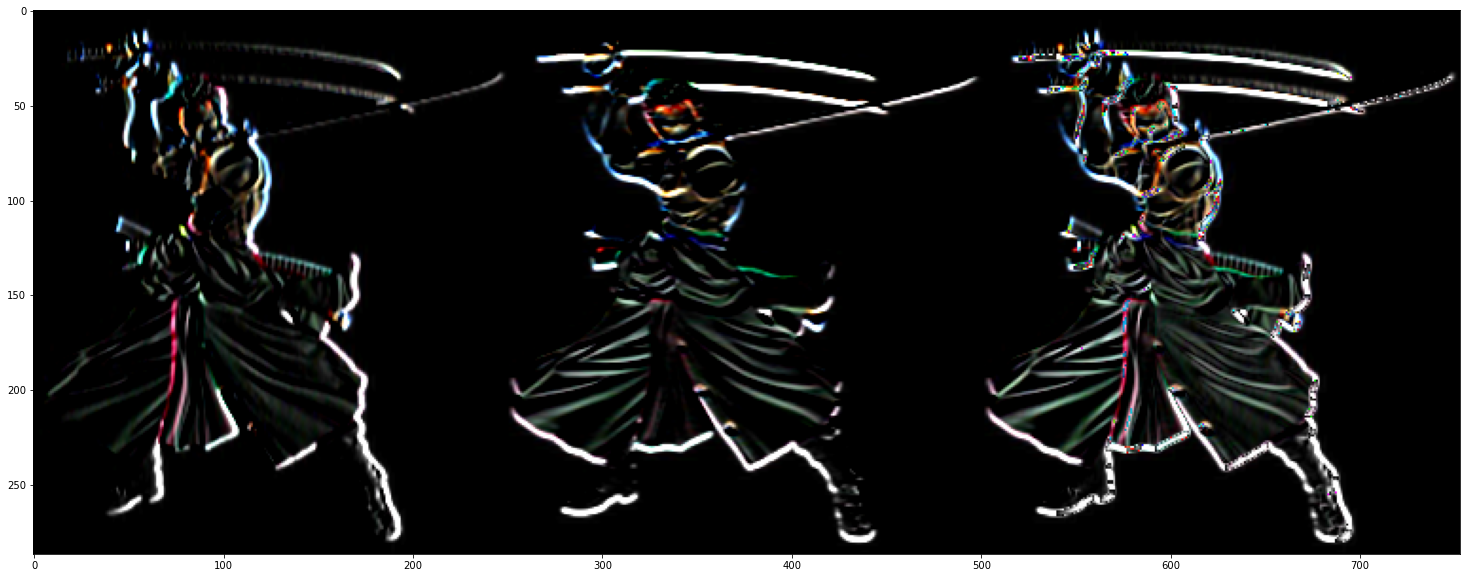

In [19]:
sobelx = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize=3)
hasil = sobelx + sobely
sobel = np.hstack((sobelx, sobely, hasil))
plt.figure(figsize=(30,10))
plt.imshow(sobel)

1.5 Prewitt

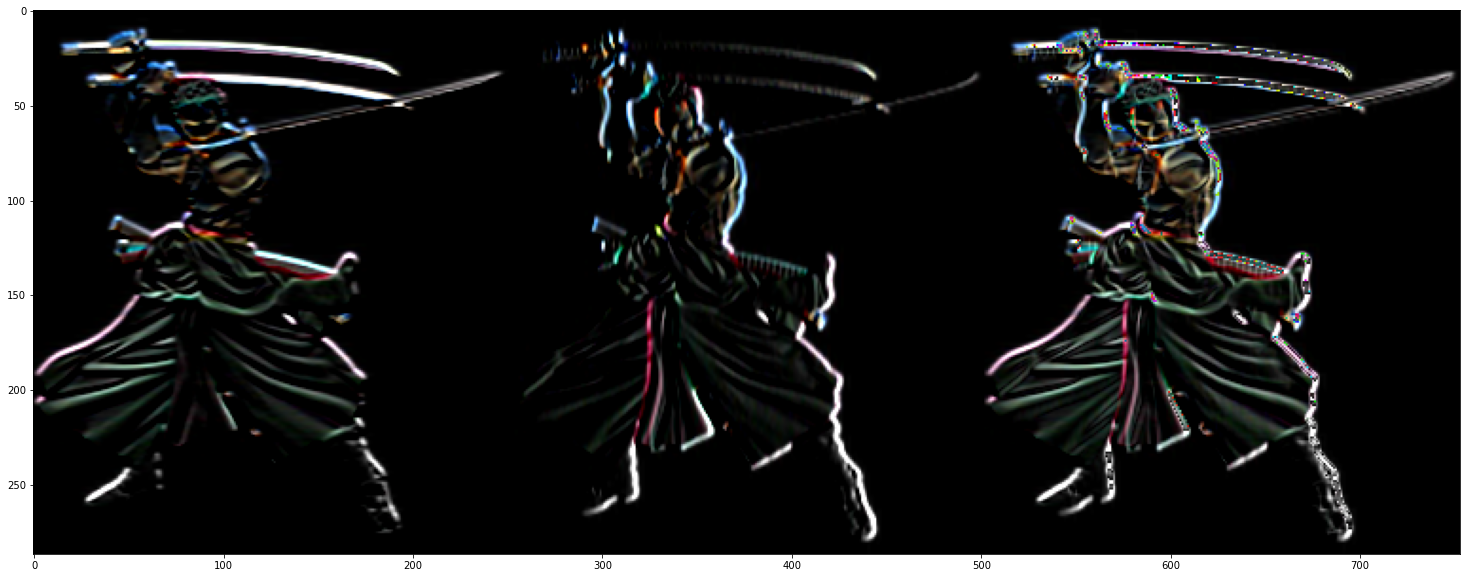

In [20]:
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

prewittx = cv2.filter2D(img, -1, kernelx)
prewitty = cv2.filter2D(img, -1, kernely)

hasil = prewittx+prewitty
prewitt = np.hstack((prewittx, prewitty, hasil))
plt.figure(figsize=(30,10))
plt.imshow(prewitt)

2. Corner Detection

2.1 Persiapan Data

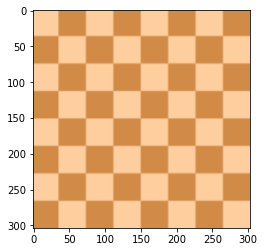

In [34]:
papanCatur = cv2.imread('data/papan_catur.png')
papanCatur = cv2.cvtColor(papanCatur, cv2.COLOR_BGR2RGB)
plt.imshow(papanCatur)

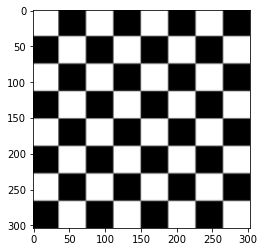

In [35]:
grayPapanCatur = cv2.cvtColor(papanCatur, cv2.COLOR_BGR2GRAY)
plt.imshow(grayPapanCatur, cmap='gray')

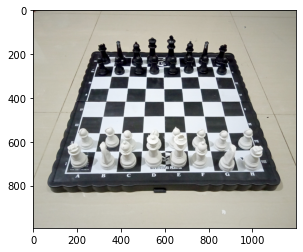

In [51]:
realCatur = cv2.imread('data/real_papan_catur.jpg')
realCatur = cv2.cvtColor(realCatur, cv2.COLOR_BGR2RGB)
plt.imshow(realCatur)

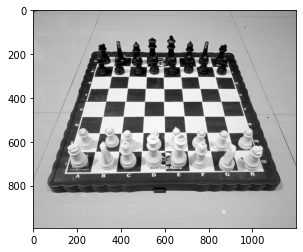

In [52]:
grayRealCatur = cv2.cvtColor(realCatur, cv2.COLOR_BGR2GRAY)
plt.imshow(grayRealCatur, cmap='gray')

2.2 Harris Corner Detection

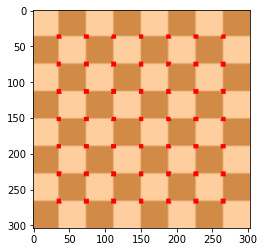

In [53]:
gray = np.float32(grayPapanCatur)
hcd = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)
hcd = cv2.dilate(hcd, None)
papanCatur[hcd>0.01 * hcd.max()] = [255, 0, 0]
plt.imshow(papanCatur)

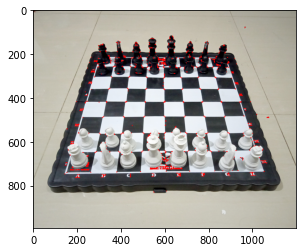

In [54]:
gray = np.float32(grayRealCatur)
hcd = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)
hcd = cv2.dilate(hcd, None)
realCatur[hcd>0.01 * hcd.max()] = [255, 0, 0]
plt.imshow(realCatur)

2.3 Shi-Tomasi Corner Detector

In [57]:
papanCatur = cv2.imread('data/papan_catur.png')
papanCatur = cv2.cvtColor(papanCatur, cv2.COLOR_BGR2RGB)
grayPapanCatur = cv2.cvtColor(papanCatur, cv2.COLOR_BGR2GRAY)

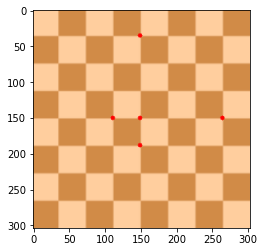

In [58]:
corners = cv2.goodFeaturesToTrack(grayPapanCatur, 5, 0.01, 10)
corners = np.int0(corners)

for i in corners:
    x, y = i.ravel()
    cv2.circle(papanCatur, (x,y), 3, 255, -1)

plt.imshow(papanCatur)

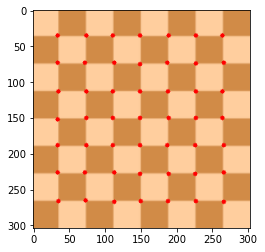

In [59]:
corners = cv2.goodFeaturesToTrack(grayPapanCatur, 64, 0.01, 10)
corners = np.int0(corners)

for i in corners:
    x, y = i.ravel()
    cv2.circle(papanCatur, (x,y), 3, 255, -1)

plt.imshow(papanCatur)

In [61]:
realCatur = cv2.imread('data/real_papan_catur.png')
realCatur = cv2.cvtColor(realCatur, cv2.COLOR_BGR2RGB)
grayRealCatur = cv2.cvtColor(realCatur, cv2.COLOR_BGR2GRAY)

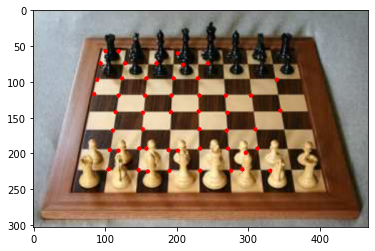

In [62]:
corners = cv2.goodFeaturesToTrack(grayRealCatur, 50, 0.01, 10)
corners = np.int0(corners)

for i in corners:
    x, y = i.ravel()
    cv2.circle(realCatur, (x,y), 3, 255, -1)

plt.imshow(realCatur)

3 Contour Detection

3.1 Find Contour

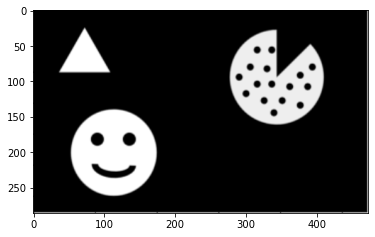

In [63]:
imgContour = cv2.imread('data/sampling_contour.png', 0)
plt.imshow(imgContour, cmap='gray')

In [68]:
contours, hierarchy = cv2.findContours(imgContour, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

print(f'tipe dari contour : {type(contours)}, size contour : {len(contours)}')
print(f'tipe dari hierarchy : {type(hierarchy)}, size contour : {hierarchy.shape}')

tipe dari contour : <class 'tuple'>, size contour : 23
tipe dari hierarchy : <class 'numpy.ndarray'>, size contour : (1, 23, 4)


In [69]:
hierarchy

array([[[ 4, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [-1,  2, -1,  0],
        [21,  0,  5, -1],
        [ 6, -1, -1,  4],
        [ 7,  5, -1,  4],
        [ 8,  6, -1,  4],
        [ 9,  7, -1,  4],
        [10,  8, -1,  4],
        [11,  9, -1,  4],
        [12, 10, -1,  4],
        [13, 11, -1,  4],
        [14, 12, -1,  4],
        [15, 13, -1,  4],
        [16, 14, -1,  4],
        [17, 15, -1,  4],
        [18, 16, -1,  4],
        [19, 17, -1,  4],
        [20, 18, -1,  4],
        [-1, 19, -1,  4],
        [22,  4, -1, -1],
        [-1, 21, -1, -1]]], dtype=int32)

3.2 Eksternal Contour

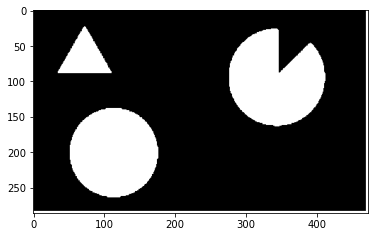

In [70]:
external_contours = np.zeros(imgContour.shape)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(external_contours, contours, i, 255, -1)

plt.imshow(external_contours, cmap='gray')

3.3 Internal Contour

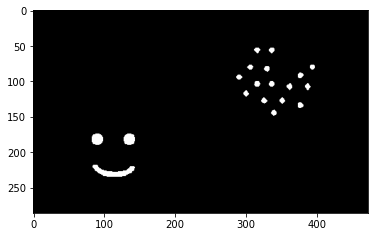

In [71]:
image_internal = np.zeros(imgContour.shape)

for i in range(len(contours)):
    if hierarchy[0][i][3] != -1:
        cv2.drawContours(image_internal, contours, i, 255, -1)

plt.imshow(image_internal, cmap='gray')